# **Image Classification**

In [ ]:
# import the required libraries
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# import deep learning libraries

import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
# ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import data

x_train = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/input.csv', delimiter=',')
y_train = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/labels.csv', delimiter =',')

# Importing the testing data
x_test = np.loadtxt('/content/drive/MyDrive/input_test.csv', delimiter=',')
y_test = np.loadtxt('/content/drive/MyDrive/Colab Notebooks/labels_test.csv', delimiter=',')

In [ ]:
/content/drive/MyDrive/Colab Notebooks/input.csv

In [ ]:
/content/drive/MyDrive/Colab Notebooks/labels.csv

/content/drive/MyDrive/Colab Notebooks/labels_test.csv

/content/drive/MyDrive/input_test.csv

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2000, 30000)
(2000,)
(400, 30000)
(400,)


In [ ]:
# Data reshape

x_train = x_train.reshape(len(x_train),100,100,3)
y_train = y_train.reshape(len(y_train), 1)

x_test = x_test.reshape(len(x_test),100,100,3)
y_test = y_test.reshape(len(y_test),1)

In [ ]:
# data after reshaping
print('Shape of the data after reshaping:')
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

Shape of the data after reshaping:
(2000, 100, 100, 3)
(2000, 1)
(400, 100, 100, 3)
(400, 1)


In [ ]:
# Dimension of data after reshape

print(x_train.ndim)
print(y_train.ndim)
print(x_test.ndim)
print(y_test.ndim)

4
2
4
2


In [ ]:
x_train[0].shape

(100, 100, 3)

In [ ]:
x_train[0]

array([[[ 37.,  39.,  25.],
        [ 26.,  24.,   9.],
        [ 34.,  25.,  10.],
        ...,
        [ 57.,  44.,  35.],
        [ 61.,  47.,  38.],
        [ 65.,  51.,  42.]],

       [[ 45.,  43.,  28.],
        [ 28.,  25.,   8.],
        [ 52.,  40.,  24.],
        ...,
        [ 54.,  41.,  32.],
        [ 57.,  43.,  34.],
        [ 61.,  47.,  38.]],

       [[ 52.,  45.,  26.],
        [ 32.,  24.,   5.],
        [ 69.,  54.,  35.],
        ...,
        [ 54.,  40.,  29.],
        [ 56.,  42.,  31.],
        [ 59.,  45.,  34.]],

       ...,

       [[ 20.,  39.,   0.],
        [101., 125.,  67.],
        [152., 182., 120.],
        ...,
        [ 46.,  41.,  19.],
        [ 60.,  55.,  33.],
        [ 60.,  55.,  33.]],

       [[ 46.,  65.,   9.],
        [116., 140.,  82.],
        [156., 186., 124.],
        ...,
        [ 64.,  60.,  35.],
        [ 75.,  71.,  46.],
        [ 72.,  68.,  43.]],

       [[ 81., 100.,  44.],
        [126., 150.,  92.],
        [146., 1

In [ ]:
x_train[0][1]

array([[ 45.,  43.,  28.],
       [ 28.,  25.,   8.],
       [ 52.,  40.,  24.],
       [ 68.,  50.,  36.],
       [ 72.,  50.,  39.],
       [ 70.,  47.,  39.],
       [ 50.,  29.,  26.],
       [ 39.,  25.,  22.],
       [ 34.,  30.,  21.],
       [ 23.,  27.,  13.],
       [ 73.,  82.,  61.],
       [102., 110.,  87.],
       [102., 105.,  86.],
       [ 27.,  24.,   9.],
       [ 44.,  30.,  27.],
       [ 37.,  25.,  25.],
       [ 30.,  25.,  22.],
       [ 29.,  25.,  22.],
       [ 26.,  21.,  18.],
       [ 25.,  20.,  16.],
       [ 29.,  30.,  24.],
       [ 31.,  37.,  25.],
       [ 19.,  26.,  10.],
       [ 46.,  51.,  31.],
       [128., 125., 108.],
       [110., 103.,  85.],
       [ 50.,  44.,  28.],
       [ 23.,  21.,   6.],
       [ 34.,  38.,  24.],
       [ 40.,  43.,  34.],
       [ 35.,  34.,  29.],
       [ 33.,  28.,  24.],
       [ 41.,  31.,  22.],
       [ 41.,  32.,  23.],
       [ 33.,  30.,  21.],
       [ 35.,  35.,  27.],
       [ 27.,  29.,  18.],
 

In [ ]:
x_train

array([[[[ 37.,  39.,  25.],
         [ 26.,  24.,   9.],
         [ 34.,  25.,  10.],
         ...,
         [ 57.,  44.,  35.],
         [ 61.,  47.,  38.],
         [ 65.,  51.,  42.]],

        [[ 45.,  43.,  28.],
         [ 28.,  25.,   8.],
         [ 52.,  40.,  24.],
         ...,
         [ 54.,  41.,  32.],
         [ 57.,  43.,  34.],
         [ 61.,  47.,  38.]],

        [[ 52.,  45.,  26.],
         [ 32.,  24.,   5.],
         [ 69.,  54.,  35.],
         ...,
         [ 54.,  40.,  29.],
         [ 56.,  42.,  31.],
         [ 59.,  45.,  34.]],

        ...,

        [[ 20.,  39.,   0.],
         [101., 125.,  67.],
         [152., 182., 120.],
         ...,
         [ 46.,  41.,  19.],
         [ 60.,  55.,  33.],
         [ 60.,  55.,  33.]],

        [[ 46.,  65.,   9.],
         [116., 140.,  82.],
         [156., 186., 124.],
         ...,
         [ 64.,  60.,  35.],
         [ 75.,  71.,  46.],
         [ 72.,  68.,  43.]],

        [[ 81., 100.,  44.],
       

In [ ]:
# Data Scaling

x_train = x_train/255.0

x_test = x_test/255.0

In [ ]:
# unique target value

np.unique(y_train)

array([0., 1.])

In [ ]:
x_train[0, :]

array([[[0.14509804, 0.15294118, 0.09803922],
        [0.10196078, 0.09411765, 0.03529412],
        [0.13333333, 0.09803922, 0.03921569],
        ...,
        [0.22352941, 0.17254902, 0.1372549 ],
        [0.23921569, 0.18431373, 0.14901961],
        [0.25490196, 0.2       , 0.16470588]],

       [[0.17647059, 0.16862745, 0.10980392],
        [0.10980392, 0.09803922, 0.03137255],
        [0.20392157, 0.15686275, 0.09411765],
        ...,
        [0.21176471, 0.16078431, 0.1254902 ],
        [0.22352941, 0.16862745, 0.13333333],
        [0.23921569, 0.18431373, 0.14901961]],

       [[0.20392157, 0.17647059, 0.10196078],
        [0.1254902 , 0.09411765, 0.01960784],
        [0.27058824, 0.21176471, 0.1372549 ],
        ...,
        [0.21176471, 0.15686275, 0.11372549],
        [0.21960784, 0.16470588, 0.12156863],
        [0.23137255, 0.17647059, 0.13333333]],

       ...,

       [[0.07843137, 0.15294118, 0.        ],
        [0.39607843, 0.49019608, 0.2627451 ],
        [0.59607843, 0

In [ ]:
x_train[0, :].shape

(100, 100, 3)

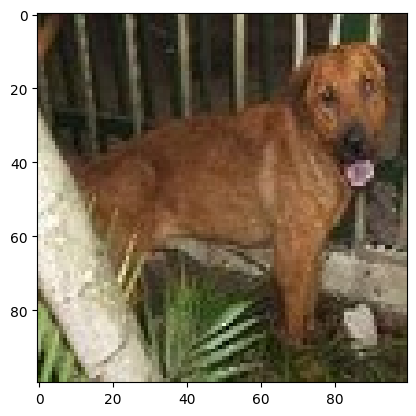

In [ ]:
# print 1st image

plt.imshow(x_train[0, :])
plt.show()

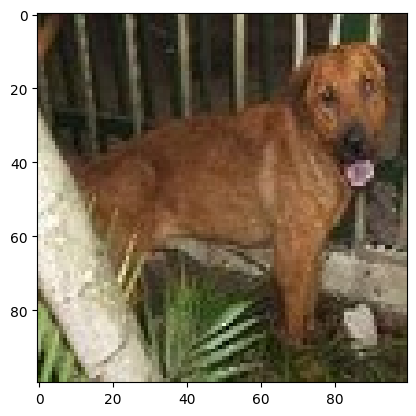

[0.]


In [ ]:
plt.imshow(x_train[0, :])
plt.show()

print(y_train[0])

In [ ]:
# target 0 as dog and 1 as cat

In [ ]:
# --- DONT RUN THIS CELL --- #

# Traditional way of building the network
# model building
# model = Sequential()

# # First Conv Layer
# model.add(Conv2D(32, (3, 3), activation = 'relu', input_shape=(100, 100, 3)))   # 32 - no.of.filters each of size 3x3
# model.MaxPooling2D((2,2))

# # Second Conv Layer
# model.add(Conv2D(32, (3, 3), activation = 'relu'))
# model.MaxPooling2D((2,2))

# # Flattening layer
# model.add(Flatten())

# # Fully connected layer
# # first dense layer
# model.add(Dense(70, activation='relu'))   # 70 neurons in the connecting layer
# # final output layer
# model.add(Dense(1, activation='sigmoid'))

In [ ]:
# Conventional way

model = Sequential([
    # first cov layer
    Conv2D(32,(3,3), activation='relu', input_shape=(100,100,3)),
    MaxPooling2D((2,2)),

    # second conv layer
    Conv2D(32,(3,3), activation='relu'),
    MaxPooling2D((2,2)),

    # fatten
    Flatten(),

    # First Dense layer
    Dense(70, activation='relu'),

    # output layer
    Dense(1, activation='sigmoid')

])

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [ ]:
# pass training data to model

model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 412ms/step - accuracy: 0.5268 - loss: 0.7866
Epoch 2/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 304ms/step - accuracy: 0.6484 - loss: 0.6535
Epoch 3/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 21s 310ms/step - accuracy: 0.7065 - loss: 0.5960
Epoch 4/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 28s 436ms/step - accuracy: 0.7498 - loss: 0.5221
Epoch 5/5
63/63 ━━━━━━━━━━━━━━━━━━━━ 19s 305ms/step - accuracy: 0.8064 - loss: 0.4396


In [ ]:
model.evaluate(x_test, y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 78ms/step - accuracy: 0.6969 - loss: 0.6717


[0.731303334236145, 0.6349999904632568]

In [ ]:
# distribution of target

unique, counts =  np.unique(y_train, return_counts=True)
print(unique, counts)


[0. 1.] [1000 1000]


274


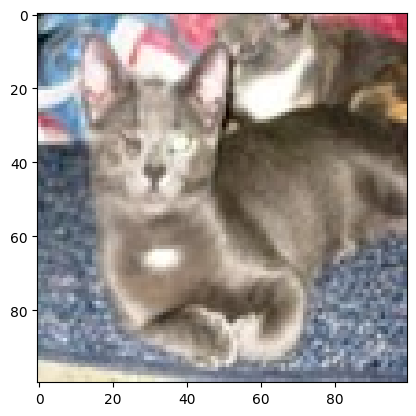

In [ ]:
# predication

rdm_img = random.randint(0, len(x_test))
print(rdm_img)
plt.imshow(x_test[rdm_img, :])
plt.show()

In [ ]:
y_train[274]

array([0.])

244


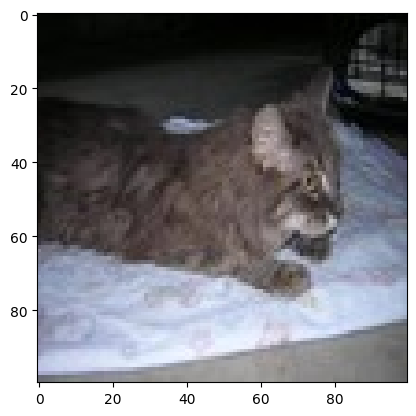

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
[[0.51391506]]
Cat [[0.51391506]]


In [ ]:
# predictions
rdm_img = random.randint(0, len(x_test))
print(rdm_img)
plt.imshow(x_test[rdm_img, :])
plt.show()

# actual condition

if y_test[rdm_img, :]==0:
  actual  = 'Dog'
else:
  actual = 'Cat'

# prediction of image in x_test

y_pred = model.predict(x_test[rdm_img, :].reshape(1,100,100,3))
print(y_pred)

if y_pred >=0.5:
   prediction= 'Cat'
   print(prediction , y_pred)

else:
  prediction = 'Dog'
  print(prediction , y_pred)


In [ ]:
if y_test[344, :]==0:
  print('Dog')
else:
  print('Cat')

Cat


136


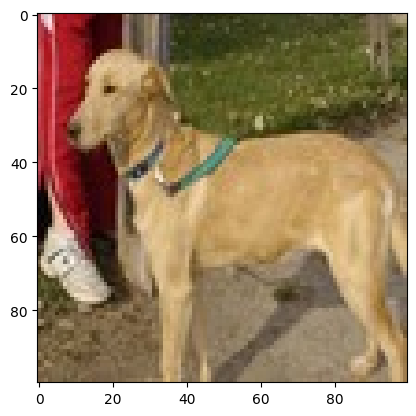

 actual Dog


In [ ]:
# predictions
rdm_img = random.randint(0, len(x_test))
print(rdm_img)
plt.imshow(x_test[rdm_img, :])
plt.show()

# actual condition

if y_test[rdm_img, :]==0:
  print(' actual Dog')
else:
  print(' actual Cat')

146


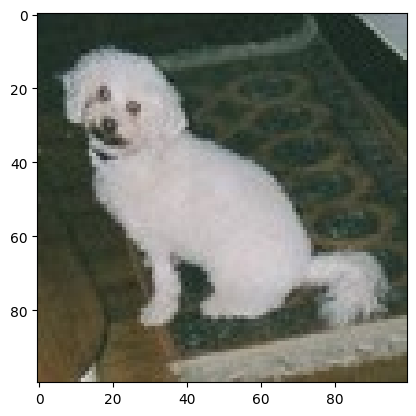

 actual Dog
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
[[0.63972676]]
 prediction cat


In [ ]:
# predictions
rdm_img = random.randint(0, len(x_test))
print(rdm_img)
plt.imshow(x_test[rdm_img, :])
plt.show()

# actual condition

if y_test[rdm_img, :]==0:
  print(' actual Dog')
else:
  print(' actual cat')

# prediction of image in x_test

y_pred = model.predict(x_test[rdm_img, :].reshape(1,100,100,3))
print(y_pred)

if y_pred >=0.5:
   prediction= 'Cat'
   print(' prediction cat')

else:
  prediction = 'Dog'
  print(' prediction dog')
